In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\suriy\Documents\DS_project\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2.0,0.00,1,1,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1,0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3,1,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,2,0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1,1,1.0,79084.10,0


# Exploratory Data Analysis

In [3]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7238,7238,15753550,Levien,684,France,Female,43.0,7.0,0.00,2,1,0.0,131093.99,0
7381,7381,15625311,Dickinson,589,Germany,Female,41.0,7.0,92618.62,1,1,1.0,101178.85,0
6563,6563,15797475,Brennan,720,France,Male,44.0,3.0,86102.27,1,1,0.0,180134.88,1
2043,2043,15635459,Shih,667,Germany,Female,27.0,3.0,106116.50,2,1,0.0,3674.71,0
5332,5332,15700627,Y?,637,Germany,Female,46.0,2.0,143500.82,1,1,0.0,166996.46,1
9249,9249,15648638,Chia,629,Spain,Male,34.0,6.0,0.00,2,1,0.0,190347.72,0
3355,3355,15751333,Atkinson,695,France,Female,36.0,2.0,0.00,2,0,1.0,167749.54,0
8105,8105,15805413,Chiang,769,France,Female,31.0,6.0,117852.26,2,1,0.0,147668.64,0
2527,2527,15727919,Chukwuemeka,671,Spain,Female,29.0,6.0,0.00,2,0,0.0,12048.67,0
2462,2462,15592765,Marks,637,France,Male,40.0,8.0,125470.81,1,1,1.0,174536.17,0


In [4]:
df.shape

(10003, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10003 non-null  int64  
 1   CustomerId       10003 non-null  int64  
 2   Surname          10003 non-null  object 
 3   CreditScore      10003 non-null  int64  
 4   Geography        10002 non-null  object 
 5   Gender           10001 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10003 non-null  int64  
 10  HasCrCard        10003 non-null  int64  
 11  IsActiveMember   10002 non-null  float64
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           10003 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             2
Age                2
Tenure             1
Balance            3
NumOfProducts      0
HasCrCard          0
IsActiveMember     1
EstimatedSalary    5
Exited             0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

All the null values are now dropped and there is no null values in the variable

In [10]:
dup=[]
print("The duplicated values are:")
for i in df['CustomerId']:
    if i in dup:
        print(i)
    else:
        dup.append(i)

The duplicated values are:
15681068
15779423
15594612


In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(9994, 14)

the duplicate values are dropped and the dataset is cleared.

In [14]:
df.sample(8)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8115,8115,15607269,Costa,492,Germany,Female,49.0,2.0,151249.45,2,1,1.0,167237.94,0
2189,2189,15799211,Anenechi,708,Spain,Female,32.0,8.0,187487.63,1,1,1.0,120115.50,0
8040,8040,15773520,Begg,672,France,Female,43.0,4.0,92599.55,2,1,1.0,167336.78,0
9237,9237,15635388,Austin,640,Spain,Male,47.0,6.0,89047.14,1,1,0.0,116286.25,0
2428,2428,15661821,Johnstone,798,Germany,Female,49.0,5.0,132571.67,1,1,1.0,31686.33,1
5242,5242,15581526,Iweobiegbulam,574,France,Male,41.0,1.0,0.00,2,0,0.0,70550.00,0
3759,3759,15582910,Turnbull,514,France,Male,38.0,4.0,112230.38,1,1,0.0,16717.11,1
2444,2444,15706587,Johnston,560,France,Male,57.0,0.0,0.00,2,0,1.0,116781.71,0


In [15]:
df=df.drop('RowNumber',axis=1)

In [16]:
df=df.drop('CustomerId',axis=1)

In [17]:
df=df.drop('Surname',axis=1)

In [18]:
df=df.rename(columns={'Exited':'Churn'})
df=df.rename(columns={'Geography':'Location'})

In [19]:
df.sample(8)

,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
6118,850,Spain,Male,37.0,2.0,0.00,2,1,0.0,119969.99,0
999,811,Germany,Female,28.0,4.0,167738.82,2,1,1.0,9903.42,0
8176,561,France,Female,22.0,6.0,186788.96,2,1,0.0,73286.80,0
9510,688,France,Male,29.0,1.0,0.00,2,1,0.0,154695.57,0
3629,493,Germany,Female,35.0,8.0,178317.60,1,0,0.0,197428.64,0
8414,749,Spain,Male,36.0,7.0,0.00,2,0,0.0,80134.65,0
3507,445,Spain,Male,45.0,10.0,0.00,2,0,1.0,90977.48,0
3790,609,Spain,Female,45.0,4.0,89122.30,1,1,1.0,199256.98,0


Removed the unwanted columns and renamed the 'Exited' column to 'Churn' and 'Geography' column to 'Location'.

In [20]:
#statistical summary of the numerical variables
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,650.493496,38.893936,5.013208,76467.353780,1.530418,0.705623,0.515009,99732.224397,0.203622
std,96.652318,10.587361,2.892522,62408.634646,0.581689,0.455785,0.499800,57664.752505,0.402711
min,350.000000,-56.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50401.420000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,99823.380000,0.000000
75%,717.000000,44.000000,7.750000,127641.417500,2.000000,1.000000,1.000000,149128.692500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [21]:
df=df[df['Age']>0]

In [22]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000
mean,650.482835,38.919027,5.013412,76459.585177,1.530477,0.705635,0.514963,99734.110820,0.203483
std,96.651448,10.486082,2.892090,62415.853244,0.581709,0.455780,0.499801,57671.879883,0.402609
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50395.650000,0.000000
50%,652.000000,37.000000,5.000000,97188.620000,1.000000,1.000000,1.000000,99828.450000,0.000000
75%,717.000000,44.000000,7.500000,127646.040000,2.000000,1.000000,1.000000,149154.690000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [23]:
#statistical summary of categorial varibales
df.describe(include=[object])

,Location,Gender
count,9991,9991
unique,3,2
top,France,Male
freq,5009,5452


In [24]:
df['Location'].value_counts()

Location
France     5009
Germany    2506
Spain      2476
Name: count, dtype: int64

In [25]:
df['Gender'].value_counts()

Gender
Male      5452
Female    4539
Name: count, dtype: int64

In [26]:
df.dtypes

CreditScore          int64
Location            object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember     float64
EstimatedSalary    float64
Churn                int64
dtype: object

In [27]:
df['IsActiveMember'].unique()

array([1., 0.])

In [28]:
df['Age']=df['Age'].astype(int)
df['Tenure']=df['Tenure'].astype(int)
df['IsActiveMember']=df['IsActiveMember'].astype(int)

In [29]:
df['Balance']=df['Balance'].apply(lambda x: int(x))
df['EstimatedSalary']=df['EstimatedSalary'].apply(lambda x: int(x))

In [30]:
df.dtypes

CreditScore         int64
Location           object
Gender             object
Age                 int32
Tenure              int32
Balance             int64
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int32
EstimatedSalary     int64
Churn               int64
dtype: object

In [31]:
df.head()

,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0,1,1,1,101348,1
1,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,502,France,Female,42,8,159660,3,1,0,113931,1
3,699,France,Female,39,1,0,2,0,0,93826,0
4,850,Spain,Female,43,2,125510,1,1,1,79084,0


In [32]:
df.tail()

,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
9998,771,France,Male,39,5,0,2,1,0,96270,0
9999,516,France,Male,35,10,57369,1,1,1,101699,0
10000,709,France,Female,36,7,0,1,0,1,42085,1
10001,772,Germany,Male,42,3,75075,2,1,0,92888,1
10002,792,France,Female,28,4,130142,1,1,0,38190,0


In [33]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000
mean,650.482835,38.919027,5.013412,76459.267641,1.530477,0.705635,0.514963,99733.618056,0.203483
std,96.651448,10.486082,2.892090,62415.633104,0.581709,0.455780,0.499801,57671.880029,0.402609
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50395.000000,0.000000
50%,652.000000,37.000000,5.000000,97188.000000,1.000000,1.000000,1.000000,99828.000000,0.000000
75%,717.000000,44.000000,7.500000,127645.500000,2.000000,1.000000,1.000000,149154.500000,0.000000
max,850.000000,92.000000,10.000000,250898.000000,4.000000,1.000000,1.000000,199992.000000,1.000000


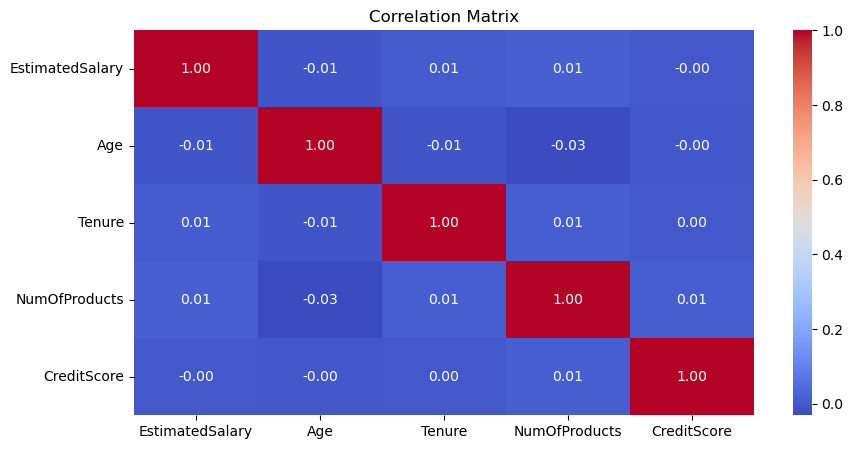

In [34]:
#checking the correlation matrix between the numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(df[['EstimatedSalary','Age','Tenure','NumOfProducts','CreditScore']].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [35]:
df.columns

Index(['CreditScore', 'Location', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

In [36]:
# Check for typo's & suspicious values and rechecking dataset

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

missing_values = df.isnull().sum()
data_types = df.dtypes

print('-'*50)
print("Missing values:")
print(missing_values)
print()

x = df.duplicated().sum()
print('-'*50)
print("Duplicate values:", x)
print()


y = df.shape
print('-'*50)
print("Shape of Dataset:", y)
print()

z = df.columns
print('-'*50)
print("Columns of Datset:", z)
print()

print('-'*50)
print("\nData types:")
print(data_types)
print()

Unique values in 'CreditScore': [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 48

The dataset has been cleaned and no suspicious values or typos have been found.

# Outliers Treatment

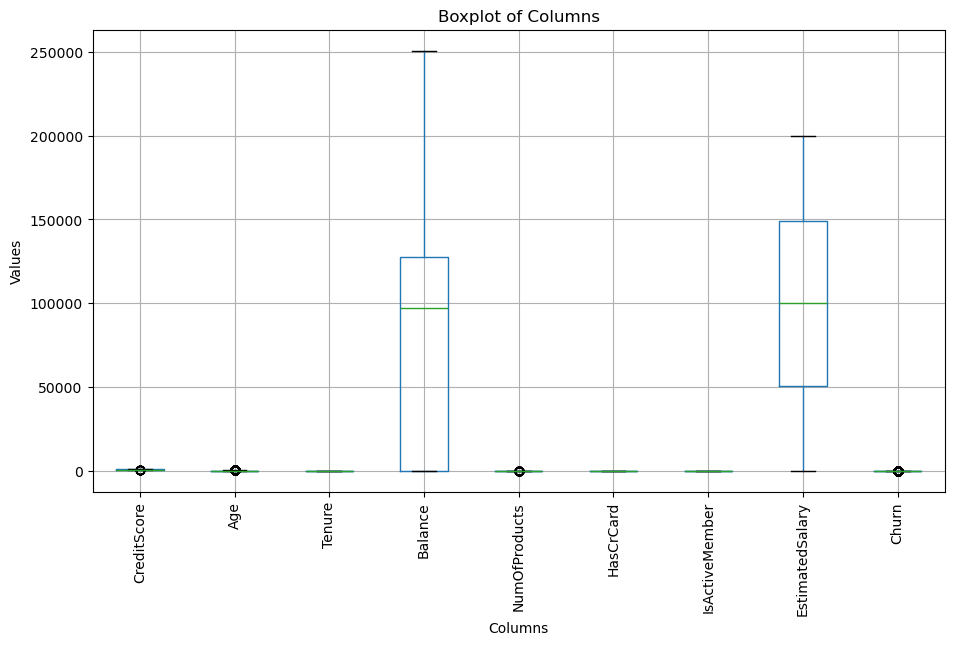

In [37]:
# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [38]:
#removing the outliers
columns_to_check = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

def remove_outliers_iqr(df, columns):
    for col in columns:
        # Calculating the Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Defining the bounds for non-outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtering the df to include only non-outlier rows
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function to remove outliers
df_cleaned = remove_outliers_iqr(df, columns_to_check)

print(f"Shape of DataFrame before removing outliers: {df.shape}")
print(f"Shape of DataFrame after removing outliers: {df_cleaned.shape}")

Shape of DataFrame before removing outliers: (9991, 11)
Shape of DataFrame after removing outliers: (9558, 11)


In [39]:
df.head()

,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0,1,1,1,101348,1
1,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,502,France,Female,42,8,159660,3,1,0,113931,1
3,699,France,Female,39,1,0,2,0,0,93826,0
4,850,Spain,Female,43,2,125510,1,1,1,79084,0


Therefore, the outliers are cleared and There is no more outliers present in any of the variable.

# Feature Encoding

- Applying one hot encoding because both variables have less number of categories.

In [40]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Location', 'Gender'], dtype='object')

In [41]:
df = pd.get_dummies(df, columns=['Gender', 'Location'], prefix=['Gender', 'Location'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Gender_Female,Gender_Male,Location_France,Location_Germany,Location_Spain
0,619,42,2,0,1,1,1,101348,1,True,False,True,False,False
1,608,41,1,83807,1,0,1,112542,0,True,False,False,False,True
2,502,42,8,159660,3,1,0,113931,1,True,False,True,False,False
3,699,39,1,0,2,0,0,93826,0,True,False,True,False,False
4,850,43,2,125510,1,1,1,79084,0,True,False,False,False,True


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 10002
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CreditScore       9991 non-null   int64
 1   Age               9991 non-null   int32
 2   Tenure            9991 non-null   int32
 3   Balance           9991 non-null   int64
 4   NumOfProducts     9991 non-null   int64
 5   HasCrCard         9991 non-null   int64
 6   IsActiveMember    9991 non-null   int32
 7   EstimatedSalary   9991 non-null   int64
 8   Churn             9991 non-null   int64
 9   Gender_Female     9991 non-null   bool 
 10  Gender_Male       9991 non-null   bool 
 11  Location_France   9991 non-null   bool 
 12  Location_Germany  9991 non-null   bool 
 13  Location_Spain    9991 non-null   bool 
dtypes: bool(5), int32(3), int64(6)
memory usage: 712.2 KB


In [43]:
df.dtypes

CreditScore         int64
Age                 int32
Tenure              int32
Balance             int64
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int32
EstimatedSalary     int64
Churn               int64
Gender_Female        bool
Gender_Male          bool
Location_France      bool
Location_Germany     bool
Location_Spain       bool
dtype: object

# Distribution of Data


In [44]:
#Using the Sturges’ Rule for a reasonable automatic bin count

import numpy as np

# Assuming 'data' is your dataset, a NumPy array or a pandas Series
def calculate_bins_sturges(df):
    n = len(df)  # Number of data points
    bins = int(np.ceil(1 + np.log2(n)))  # Sturges' formula
    return bins

# Example usage
bins = calculate_bins_sturges(df)

print(f"Number of bins according to Sturges rule: {bins}")

Number of bins according to Sturges rule: 15


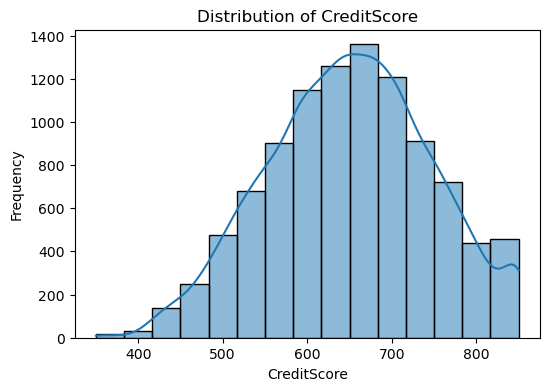

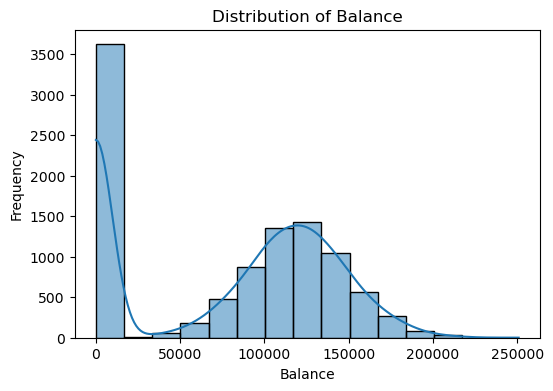

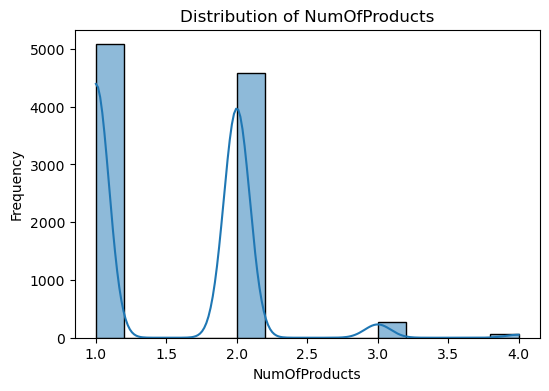

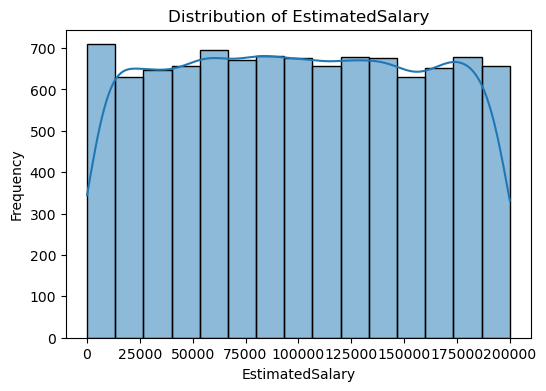

In [45]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=15, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [46]:
#checking for skewness in the continuous variables
df[continuous_vars].skew()

CreditScore       -0.071486
Balance           -0.140100
NumOfProducts      0.745024
EstimatedSalary    0.004648
dtype: float64

Original Skewness of NumOfProducts: 0.7450236110716022
Transformed Skewness of NumOfProducts: 0.35042012984200777


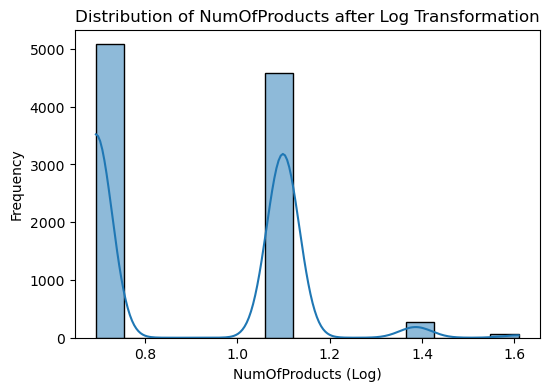

In [47]:
#Applying log tranformation on the NoofProducts  to reduce the skewness

df['NumOfProducts_log'] = np.log1p(df['NumOfProducts'])  # np.log1p handles zero values (log(1 + x))

print(f"Original Skewness of NumOfProducts: {df['NumOfProducts'].skew()}")
print(f"Transformed Skewness of NumOfProducts: {df['NumOfProducts_log'].skew()}")

#plot distribution after log transformation
plt.figure(figsize=(6, 4))
sns.histplot(df['NumOfProducts_log'], bins=15, kde=True)
plt.title('Distribution of NumOfProducts after Log Transformation')
plt.xlabel('NumOfProducts (Log)')
plt.ylabel('Frequency')
plt.show()

Original Skewness of Age: 1.0127570385407858
Transformed Skewness of Age: 0.20424057089730266


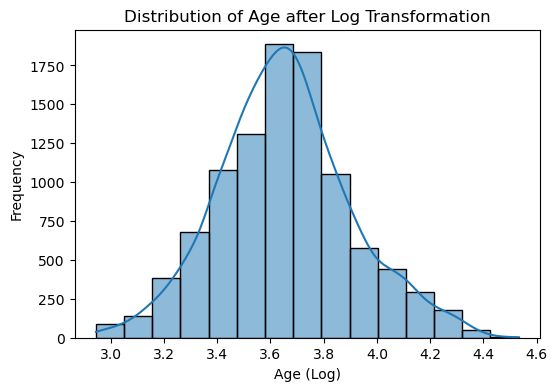

In [48]:
#Applying the log transformation on the Age column to reduce the skewness

df['Age_log'] = np.log1p(df['Age'])   # np.log1p handles zero values (log(1 + x))

print(f"Original Skewness of Age: {df['Age'].skew()}")
print(f"Transformed Skewness of Age: {df['Age_log'].skew()}")

#plot distribution after log transformation
plt.figure(figsize=(6, 4))
sns.histplot(df['Age_log'], bins=15, kde=True)
plt.title('Distribution of Age after Log Transformation')
plt.xlabel('Age (Log)')
plt.ylabel('Frequency')
plt.show()

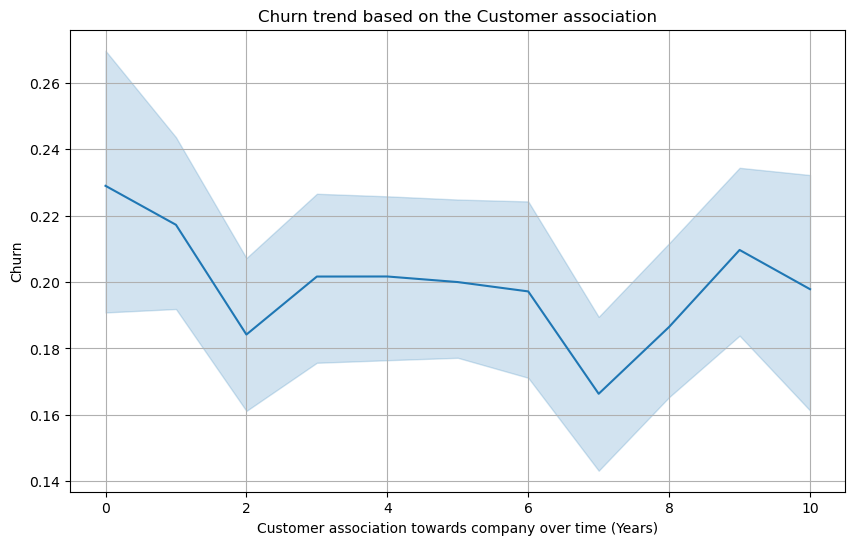

In [49]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Tenure', y='Churn', data=df_cleaned)
plt.title('Churn trend based on the Customer association')
plt.xlabel('Customer association towards company over time (Years)')
plt.ylabel('Churn')
plt.grid(True)
plt.show()

In [50]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn', 'Gender_Female',
       'Gender_Male', 'Location_France', 'Location_Germany', 'Location_Spain',
       'NumOfProducts_log', 'Age_log'],
      dtype='object')

In [51]:
df=df.drop('NumOfProducts',axis=1)

In [52]:
df=df.drop('Age',axis=1)

In [53]:
df.columns

Index(['CreditScore', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn', 'Gender_Female', 'Gender_Male',
       'Location_France', 'Location_Germany', 'Location_Spain',
       'NumOfProducts_log', 'Age_log'],
      dtype='object')

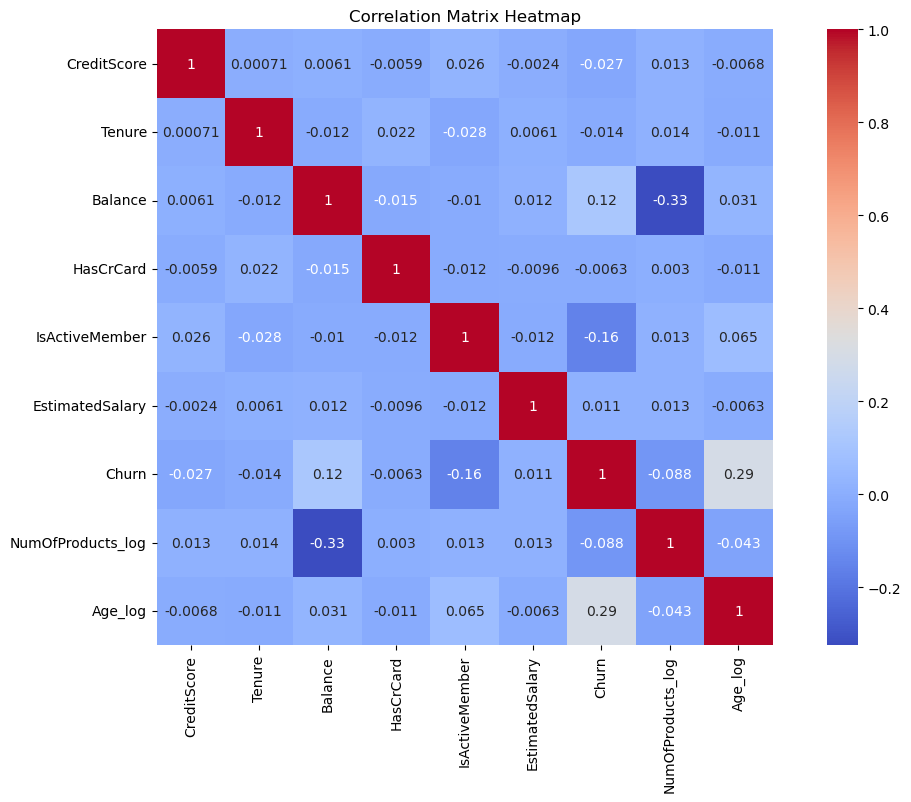

In [54]:
#checking colinearity between variables
numerical_features = df.select_dtypes(include=['number']).columns
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(14,8)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Model training & Testing


In [55]:
X = df.drop("Churn",axis=1)
y = df['Churn']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Using 70% of data for training and 30% for testing


In [57]:
X_train.shape, y_train.shape

((6993, 13), (6993,))

In [58]:
X_test.shape, y_test.shape

((2998, 13), (2998,))

In [59]:
df.columns

Index(['CreditScore', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn', 'Gender_Female', 'Gender_Male',
       'Location_France', 'Location_Germany', 'Location_Spain',
       'NumOfProducts_log', 'Age_log'],
      dtype='object')

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
import pickle

In [61]:
# Define the LogTransformer class
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Applies log transformation to specified columns."""
        X = pd.DataFrame(X)
        if 'NumOfProducts' in X.columns:
            X['NumOfProducts_log'] = np.log1p(X['NumOfProducts'])
            X = X.drop(columns=['NumOfProducts'])
        if 'Age' in X.columns:
            X['Age_log'] = np.log1p(X['Age'])
            X = X.drop(columns=['Age'])
        return X

In [62]:
# Define the GenderLocationBinarizer class
class GenderLocationBinarizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Converts 'Gender' and 'Location' into binary columns."""
        X = pd.DataFrame(X)
        if 'Gender' in X.columns:
            X['Gender_Female'] = (X['Gender'] == 'Female').astype(int)
            X['Gender_Male'] = (X['Gender'] == 'Male').astype(int)
            X = X.drop(columns=['Gender'])
        if 'Location' in X.columns:
            X['Location_France'] = (X['Location'] == 'France').astype(int)
            X['Location_Germany'] = (X['Location'] == 'Germany').astype(int)
            X['Location_Spain'] = (X['Location'] == 'Spain').astype(int)
            X = X.drop(columns=['Location'])
        return X

In [63]:
# Define the map_yes_no function
def map_yes_no(df):
    """Maps 'Yes'/'No' values to 1/0 for categorical columns."""
    if isinstance(df, pd.DataFrame):
        return df.applymap(lambda x: {'Yes': 1, 'No': 0}.get(x, x))
    elif isinstance(df, pd.Series):
        return df.map({'Yes': 1, 'No': 0})
    else:
        raise TypeError("Expected input to be a DataFrame or Series.")

# Preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numeric', StandardScaler(), ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary']),
    ('categoric', FunctionTransformer(map_yes_no), ['HasCrCard', 'IsActiveMember']),
    ('binary', 'passthrough', ['Gender_Female', 'Gender_Male', 'Location_France', 'Location_Germany', 'Location_Spain']),
    ('log_transformed', 'passthrough', ['NumOfProducts_log', 'Age_log'])
])


In [64]:
# Create pipeline
pipeline = Pipeline(steps=[
    ('log_transformer', LogTransformer()),
    ('gender_location_binarizer', GenderLocationBinarizer()),
    ('preprocessor', preprocessor)
])

In [65]:
# Debug: Check data before fitting
print("Sample of X_train before pipeline fitting:", X_train.head())

# Fit pipeline
pipeline.fit(X_train)

Sample of X_train before pipeline fitting:       CreditScore  Tenure  Balance  HasCrCard  IsActiveMember  \
7924          730       5   118866          1               1   
5588          730       1        0          1               1   
5219          685       4   104719          1               0   
8941          657       7        0          1               0   
2730          667       1        0          1               0   

      EstimatedSalary  Gender_Female  Gender_Male  Location_France  \
7924           163317          False         True            False   
5588           124364           True        False             True   
5219            38691          False         True             True   
8941           185827          False         True             True   
2730            91573          False         True             True   

      Location_Germany  Location_Spain  NumOfProducts_log   Age_log  
7924             False            True           0.693147  3.663562  
5588 

C:\Users\suriy\AppData\Local\Temp\ipykernel_1368\820614418.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: {'Yes': 1, 'No': 0}.get(x, x))


Pipeline(steps=[('log_transformer', LogTransformer()),
                ('gender_location_binarizer', GenderLocationBinarizer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['CreditScore', 'Tenure',
                                                   'Balance',
                                                   'EstimatedSalary']),
                                                 ('categoric',
                                                  FunctionTransformer(func=<function map_yes_no at 0x000002148B78BB80>),
                                                  ['HasCrCard',
                                                   'IsActiveMember']),
                                                 ('binary', 'passthrough',
                                                  ['Gender_Female',
                                                   'Gender_Male',
                                                   'Location_France',
                                                   'Location_Germany',
                                                   'Location_Spain']),
                                                 ('log_transformed',
                                                  'passthrough',
                                                  ['NumOfProducts_log',
                                                   'Age_log'])]))])

In [66]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE: X_train shape:", X_train_smote.shape, "y_train shape:", y_train_smote.shape)

After SMOTE: X_train shape: (11170, 13) y_train shape: (11170,)


c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [67]:
# Train RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [68]:
# Save the pipeline and model
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
print("Pipeline saved successfully.")

with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model saved successfully.")

Pipeline saved successfully.
Model saved successfully.


In [69]:
X_train_smote.head()

,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Location_France,Location_Germany,Location_Spain,NumOfProducts_log,Age_log
0,730,5,118866,1,1,163317,False,True,False,False,True,0.693147,3.663562
1,730,1,0,1,1,124364,True,False,True,False,False,1.098612,3.637586
2,685,4,104719,1,0,38691,False,True,True,False,False,1.098612,3.044522
3,657,7,0,1,0,185827,False,True,True,False,False,1.098612,3.663562
4,667,1,0,1,0,91573,False,True,True,False,False,1.098612,3.178054


In [70]:
X_test.head()

,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Location_France,Location_Germany,Location_Spain,NumOfProducts_log,Age_log
4027,762,10,100260,1,1,77142,False,True,False,True,False,1.386294,4.043051
7350,632,6,59972,0,1,148172,False,True,False,True,False,1.098612,3.761200
487,542,3,135096,1,1,14353,False,True,True,False,False,0.693147,3.688879
39,582,6,70349,0,1,178074,False,True,False,True,False,1.098612,3.737670
6801,711,8,0,1,1,67508,True,False,True,False,False,0.693147,3.583519


In [71]:
#check for data imbalance
y_train.value_counts()

Churn
0    5585
1    1408
Name: count, dtype: int64

In [72]:
y_train_smote.value_counts()

Churn
0    5585
1    5585
Name: count, dtype: int64

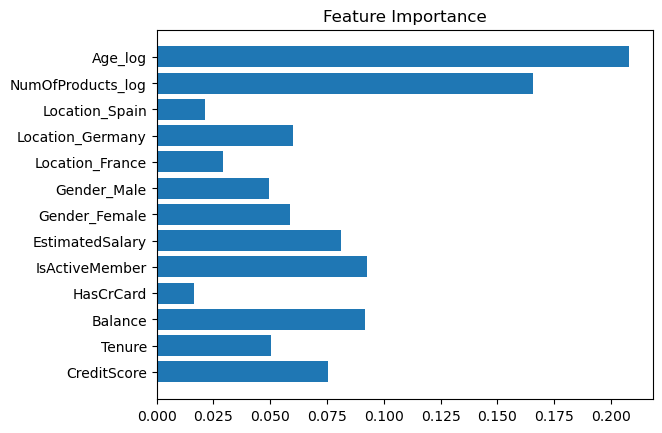

In [73]:
# Feature importance plot
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,Age_log,0.243202
1,EstimatedSalary,0.144715
2,CreditScore,0.142013
3,Balance,0.141153
4,NumOfProducts_log,0.126032
5,Tenure,0.083910
6,IsActiveMember,0.040436
7,Location_Germany,0.019963
8,HasCrCard,0.019176
9,Location_France,0.010487


In [75]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier 

In [76]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="lbfgs"),
    "Random Forest": RandomForestClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
     "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [77]:
hyperparameters = {
    "Logistic Regression": {
        "C": [0.1, 0.5, 1],  # Reduced range for faster tuning
        "solver": ["liblinear", "lbfgs"]  # Fixed set of solvers
    },
    "CatBoost": {
        "iterations": [500, 800, 1000],  # Increased boosting iterations
        "learning_rate": [0.01, 0.03, 0.05, 0.1],  # Expanded range for finer control
        "depth": [6, 8, 10],  # Added larger tree depths
        "l2_leaf_reg": [3, 5, 10],  # Regularization tuning
        "bagging_temperature": [0.5, 0.75, 1],  # Fine-tuning subsampling
        "grow_policy": ["SymmetricTree", "Lossguide"],  # Additional tree-building strategies
    },
    "Random Forest": {
        "n_estimators": [300, 500, 1000],  # Smaller set of estimators
        "max_depth": [10, 20, None],  # Balanced depth options
        "min_samples_split": [2, 5, 10],  # Reduced range for efficiency
        "min_samples_leaf": [1, 2, 5]  # Minimal leaf sizes for faster computation
    },
    "LightGBM": {
        "n_estimators": [100, 200, 300],  # Expanded boosting rounds
        "num_leaves": [31, 50, 70],  # Increased leaf count for complexity
        "learning_rate": [0.01, 0.05, 0.1],  # Narrowed to stable ranges
        "max_depth": [-1, 10, 15, 20],  # Larger depth options
        "min_child_samples": [10, 20, 30],  # Fine-tuning leaf-wise growth
        "subsample": [0.8, 0.9, 1],  # Added more variability in subsampling
        "colsample_bytree": [0.8, 0.9, 1],  # Column sampling ratios
    },
    "XGBoost": {
        "n_estimators": [200, 300],  # Increased boosting iterations
        "max_depth": [6, 8, 10],  # Larger tree depths
        "learning_rate": [0.01, 0.05, 0.1],  # Finer control of learning rate
        "subsample": [0.7, 0.8, 0.9],  # Fine-tuned subsampling
        "colsample_bytree": [0.7, 0.8, 0.9],  # Variability in feature sampling
        "gamma": [0.1, 0.2, 0.5],  # Regularization to prevent overfitting
        "min_child_weight": [1, 2, 3],  # Added smaller child weights
    }
}

In [78]:
best_model = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    if model_name in hyperparameters:
        param_distributions = hyperparameters[model_name]  # Using the parameter grid for RandomizedSearchCV
    else:
        print(f"No hyperparameters defined for {model_name}. Skipping...\n")
        continue

    # Setting up StratifiedKFold for balanced splits
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Setting up RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,  # Parameter distributions for RandomizedSearchCV
        n_iter=50,  # Number of random combinations to test
        cv=cv_strategy,  # StratifiedKFold for cross-validation
        scoring="accuracy",  # Use accuracy as the scoring metric
        n_jobs=-1,  # Use all available processors for parallel computation
        random_state=42  # Ensures reproducibility
    )

    # Performing the RandomizedSearchCV
    random_search.fit(X_train_smote, y_train_smote)

    # Storing the best model and the parameters
    best_model[model_name] = random_search.best_estimator_
    print(f"Best Parameters for {model_name}: {random_search.best_params_}")
    print(f"Best Accuracy for {model_name}: {random_search.best_score_: .2f}\n")

Tuning Logistic Regression...


c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Logistic Regression: {'solver': 'lbfgs', 'C': 1}
Best Accuracy for Logistic Regression:  0.81

Tuning Random Forest...
Best Parameters for Random Forest: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Accuracy for Random Forest:  0.91

Tuning CatBoost...
Best Parameters for CatBoost: {'learning_rate': 0.03, 'l2_leaf_reg': 3, 'iterations': 500, 'grow_policy': 'SymmetricTree', 'depth': 10, 'bagging_temperature': 0.75}
Best Accuracy for CatBoost:  0.91

Tuning LightGBM...
[LightGBM] [Info] Number of positive: 5585, number of negative: 5585
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 11170, number of used features: 13
[LightGBM] [Info] [binary:BoostFromSc

c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\xgboost\core.py:158: UserWarning: [23:21:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.7}
Best Accuracy for XGBoost:  0.91



In [79]:
best_model

{'Logistic Regression': LogisticRegression(C=1, max_iter=1000),
 'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=42),
 'CatBoost': <catboost.core.CatBoostClassifier at 0x21492062bb0>,
 'LightGBM': LGBMClassifier(colsample_bytree=0.8, min_child_samples=10, n_estimators=300,
                num_leaves=50, random_state=42, subsample=0.9),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=0.5, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.05, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
               max_leaves=None, min_child_weight=1, missing=nan,
               mon

In [112]:
import pickle
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model['LightGBM'],f)

In [113]:
y_test_pred=best_model['LightGBM'].predict(X_test)
y_test_prob=best_model['LightGBM'].predict_proba(X_test)[:,1]

In [114]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
y_test_prob

array([0.99455004, 0.00343802, 0.02272547, ..., 0.03538434, 0.37340332,
       0.01767675])

In [116]:
print(f"Accuracy:{accuracy_score(y_test,y_test_pred)}")
print(f"ROC-AUC Score:{roc_auc_score(y_test,y_test_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_test_pred)}")
print(f"Classification Report:\n{classification_report(y_test,y_test_pred)}")

Accuracy:0.8552368245496998
ROC-AUC Score:0.735890771175727
Confusion Matrix:
[[2232  141]
 [ 293  332]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2373
           1       0.70      0.53      0.60       625

    accuracy                           0.86      2998
   macro avg       0.79      0.74      0.76      2998
weighted avg       0.85      0.86      0.85      2998



In [117]:
with open("best_model.pkl","rb") as f:
  model=pickle.load(f)
  with open("pipeline.pkl","rb")as f:
    pipeline_loaded=pickle.load(f)

In [118]:
df.columns

Index(['CreditScore', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn', 'Gender_Female', 'Gender_Male',
       'Location_France', 'Location_Germany', 'Location_Spain',
       'NumOfProducts_log', 'Age_log'],
      dtype='object')

In [119]:
def make_prediction(input_data):
    # Convert input data into a DataFrame
    input_df = pd.DataFrame([input_data])

    # Use the pipeline to preprocess the data
    transformed_input = pipeline.transform(input_df)


    # Use LightGBM for prediction
    prediction = model.predict(transformed_input)[0]
    probability = model.predict_proba(transformed_input)[0, 1]

    # Return the result
    return "Churn" if prediction == 1 else "No Churn", probability

In [120]:

examp= {
    'CreditScore': 680,
    'Tenure': 1,
    'Balance': 656,
    'EstimatedSalary': 50000,
    'NumOfProducts': 3,
    'Age': 27,
    'Gender': 'Male',
    'Location': 'Spain',
    'HasCrCard': 'Yes',
    'IsActiveMember': 'No'
}

In [121]:
prediction,prob=make_prediction(examp)

C:\Users\suriy\AppData\Local\Temp\ipykernel_1368\820614418.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: {'Yes': 1, 'No': 0}.get(x, x))
c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [122]:
print(f"Prediction:{prediction}\nProbability :{prob:.2f}")

Prediction:No Churn
Probability :0.38


C:\Users\suriy\AppData\Local\Temp\ipykernel_1368\820614418.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: {'Yes': 1, 'No': 0}.get(x, x))
c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


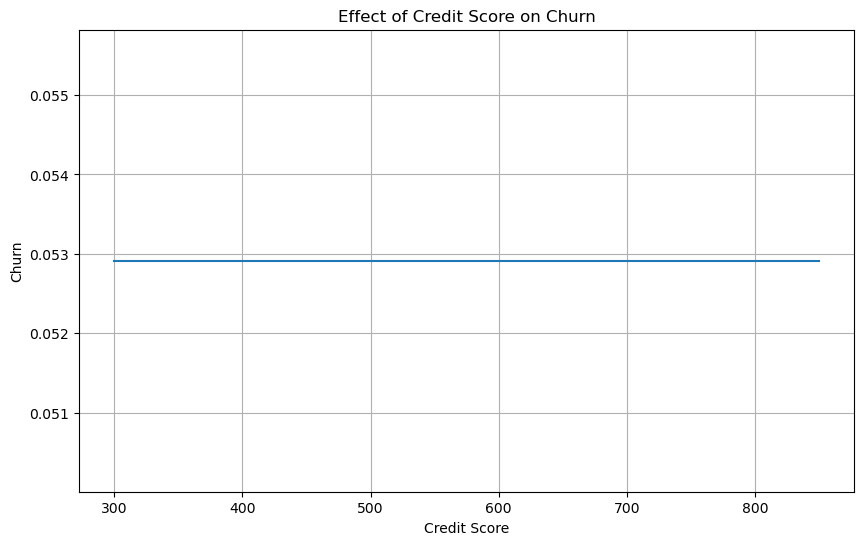

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# Create a dataset for future predictions
# Example: Varying CreditScore while keeping other features constant
future_data = pd.DataFrame({
    'CreditScore': np.linspace(300, 850, 100),  # Range of credit scores
    'Tenure': [10] * 100,  # Fixed value
    'Balance': [50000] * 100,  # Fixed value
    'EstimatedSalary': [75000] * 100,  # Fixed value
    'NumOfProducts': [2] * 100,  # Fixed value
    'Gender': ['Male'] * 100,  # Fixed value
    'Location': ['Spain'] * 100,  # Fixed value

    'Age': [35] * 100,  # Fixed value
    'HasCrCard': ['Yes'] * 100,  # Fixed value
    'IsActiveMember': ['Yes'] * 100  # Fixed value
})

# Preprocess the data using the pipeline
future_data_transformed = pipeline.transform(future_data)

# Predict using the trained model
future_data['Prob'] = model.predict_proba(future_data_transformed)[:,1]

# Plot the predictions
plt.figure(figsize=(10, 6))
sns.lineplot(x='CreditScore', y='Prob', data=future_data)
plt.title('Effect of Credit Score on Churn')
plt.xlabel('Credit Score')
plt.ylabel('Churn')
plt.grid(True)
plt.show()

C:\Users\suriy\AppData\Local\Temp\ipykernel_1368\820614418.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: {'Yes': 1, 'No': 0}.get(x, x))
c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


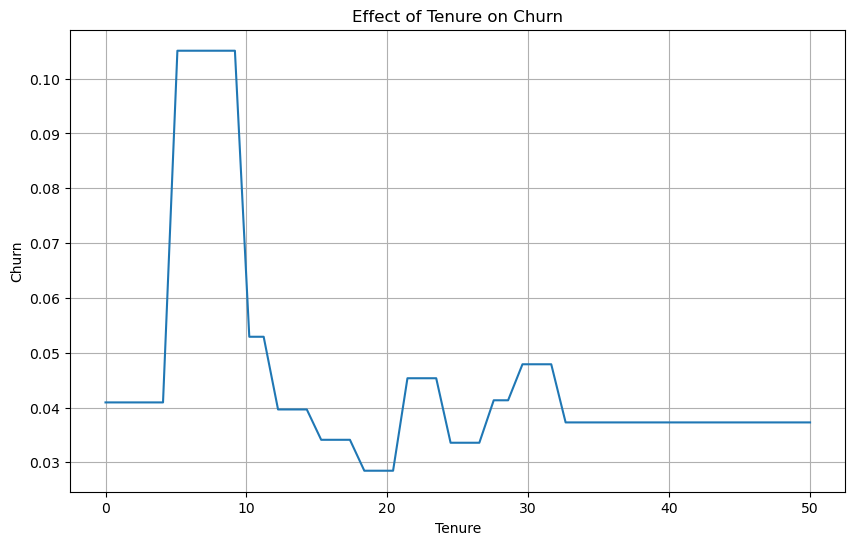

In [124]:
# Create a dataset for future predictions with varying Tenure
future_data = pd.DataFrame({
    'CreditScore': [700] * 50,  # Fixed value
    'Tenure': np.linspace(0, 50, 50),  # Range of Tenure
    'Balance': [50000] * 50,  # Fixed value
    'EstimatedSalary': [75000] * 50,  # Fixed value
    'Gender': ['Male'] * 50,  # Fixed value
    'Location': ['Spain'] * 50,  # Fixed value
    'NumOfProducts': [2] * 50,  # Fixed value
    'Age': [35] * 50,  # Fixed value
    'HasCrCard': ['Yes'] * 50,  # Fixed value
    'IsActiveMember': ['Yes'] * 50  # Fixed value
})

# Preprocess the data using the pipeline
future_data_transformed = pipeline.transform(future_data)

# Predict using the trained model
future_data['Prediction'] = model.predict_proba(future_data_transformed)[:,1]

# Plot the predictions
plt.figure(figsize=(10, 6))
sns.lineplot(x='Tenure', y='Prediction', data=future_data)
plt.title('Effect of Tenure on Churn')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.grid(True)
plt.show()

C:\Users\suriy\AppData\Local\Temp\ipykernel_1368\820614418.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: {'Yes': 1, 'No': 0}.get(x, x))
c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


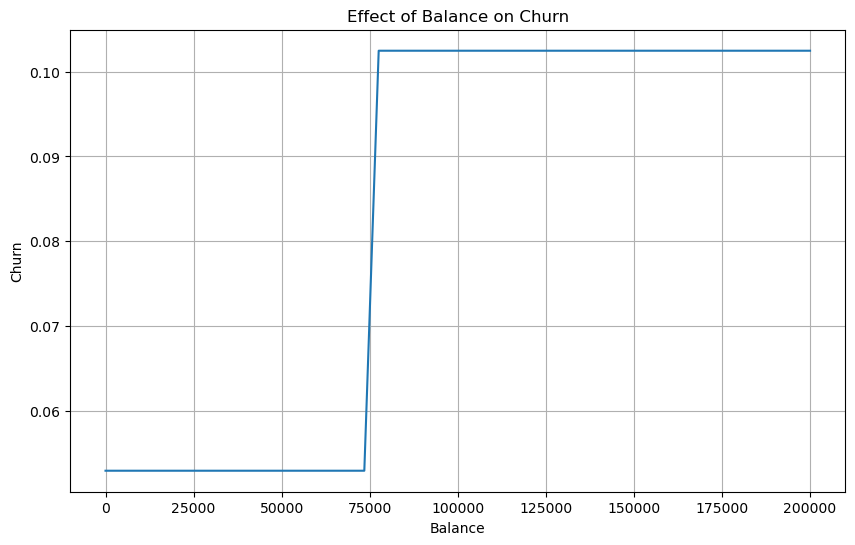

In [125]:
# Create a dataset for future predictions with varying Balance
future_data = pd.DataFrame({
    'CreditScore': [700] * 50,  # Fixed value
    'Tenure': [10] * 50,  # Fixed value
    'Balance': np.linspace(0, 200000, 50),  # Range of Balance
    'EstimatedSalary': [75000] * 50,  # Fixed value
    'Gender': ['Male'] * 50,  # Fixed value
    'Location': ['Spain'] * 50,  # Fixed value
    'NumOfProducts': [2] * 50,  # Fixed value
    'Age': [35] * 50,  # Fixed value
    'HasCrCard': ['Yes'] * 50,  # Fixed value
    'IsActiveMember': ['Yes'] * 50  # Fixed value
})

# Preprocess the data using the pipeline
future_data_transformed = pipeline.transform(future_data)

# Predict using the trained model
future_data['Prediction'] = model.predict_proba(future_data_transformed)[:,1]

# Plot the predictions
plt.figure(figsize=(10, 6))
sns.lineplot(x='Balance', y='Prediction', data=future_data)
plt.title('Effect of Balance on Churn')
plt.xlabel('Balance')
plt.ylabel('Churn')
plt.grid(True)
plt.show()

C:\Users\suriy\AppData\Local\Temp\ipykernel_1368\820614418.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: {'Yes': 1, 'No': 0}.get(x, x))
c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


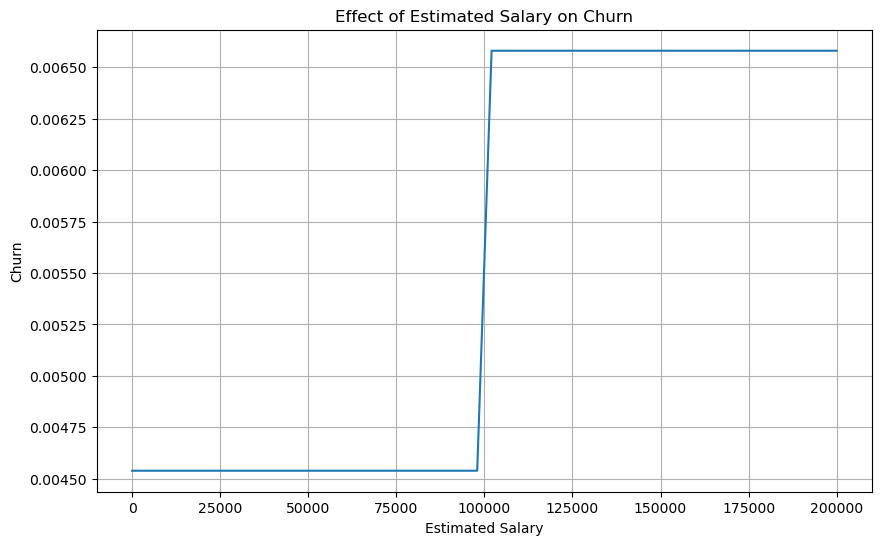

In [126]:


# Create a dataset for future predictions with varying EstimatedSalary
future_data = pd.DataFrame({
    'CreditScore': [700] * 50,  # Fixed value
    'Tenure': [10] * 50,  # Fixed value
    'Balance': [50000] * 50,  # Fixed value
    'EstimatedSalary': np.linspace(0, 200000, 50),  # Range of EstimatedSalary
    'Gender': ['Male'] * 50,  # Fixed value
    'Location': ['France'] * 50,  # Fixed value
    'NumOfProducts': [2] * 50,  # Fixed value
    'Age': [35] * 50,  # Fixed value
    'HasCrCard': ['Yes'] * 50,  # Fixed value
    'IsActiveMember': ['No'] * 50  # Fixed value
})

# Preprocess the data using the pipeline
future_data_transformed = pipeline.transform(future_data)

# Predict using the trained model
future_data['Prediction'] = model.predict_proba(future_data_transformed)[:,1]


# Plot the predictions
plt.figure(figsize=(10, 6))
sns.lineplot(x='EstimatedSalary', y='Prediction', data=future_data)
plt.title('Effect of Estimated Salary on Churn')
plt.xlabel('Estimated Salary')
plt.ylabel('Churn')
plt.grid(True)
plt.show()

C:\Users\suriy\AppData\Local\Temp\ipykernel_1368\820614418.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: {'Yes': 1, 'No': 0}.get(x, x))
c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


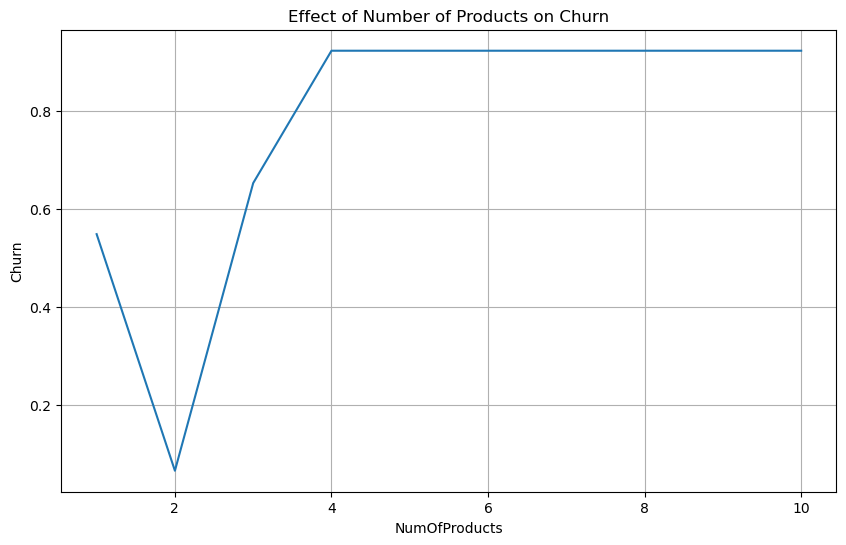

In [127]:
# Create a dataset for future predictions with varying NumberOfProducts
future_data = pd.DataFrame({
    'CreditScore': [700] * 10,  # Fixed value
    'Tenure': [10] * 10,  # Fixed value
    'Balance': [50000] * 10,  # Fixed value
    'EstimatedSalary': [75000] * 10,  # Fixed value
    'Gender': ['Male'] * 10,  # Fixed value
    'Location': ['LocationA'] * 10,  # Fixed value
    'NumOfProducts': np.arange(1, 11, 1),  # Range of NumberOfProducts (e.g., 1 to 10)
    'Age': [35] * 10,  # Fixed value
    'HasCrCard': ['Yes'] * 10,  # Fixed value
    'IsActiveMember': ['Yes'] * 10  # Fixed value
})

# Preprocess the data using the pipeline
future_data_transformed = pipeline.transform(future_data)

# Predict using the trained model
future_data['Prediction'] = model.predict_proba(future_data_transformed)[:,1]

# Plot the predictions
plt.figure(figsize=(10, 6))
sns.lineplot(x='NumOfProducts', y='Prediction', data=future_data)
plt.title('Effect of Number of Products on Churn')
plt.xlabel('NumOfProducts')
plt.ylabel('Churn')
plt.grid(True)
plt.show()

C:\Users\suriy\AppData\Local\Temp\ipykernel_1368\820614418.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: {'Yes': 1, 'No': 0}.get(x, x))
c:\Users\suriy\miniconda3\envs\my_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


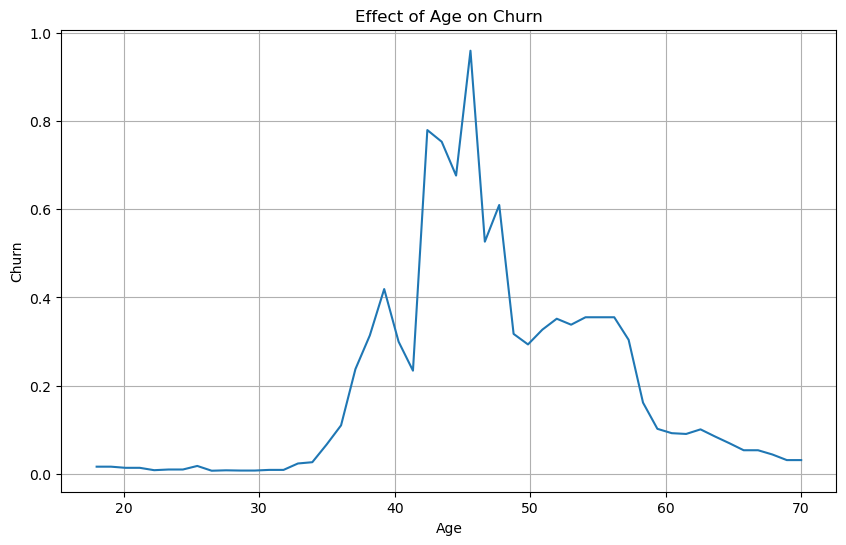

In [128]:
# Create a dataset for future predictions with varying Age
future_data = pd.DataFrame({
    'CreditScore': [700] * 50,  # Fixed value
    'Tenure': [10] * 50,  # Fixed value
    'Balance': [50000] * 50,  # Fixed value
    'EstimatedSalary': [75000] * 50,  # Fixed value
    'Gender': ['Male'] * 50,  # Fixed value
    'Location': ['LocationA'] * 50,  # Fixed value
    'NumOfProducts': [2] * 50,  # Fixed value
    'Age': np.linspace(18, 70, 50),  # Range of Age from 18 to 70
    'HasCrCard': ['Yes'] * 50,  # Fixed value
    'IsActiveMember': ['Yes'] * 50  # Fixed value
})

# Preprocess the data using the pipeline
future_data_transformed = pipeline.transform(future_data)

# Predict using the trained model
future_data['Prediction'] = model.predict_proba(future_data_transformed)[:,1]

# Plot the predictions
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Prediction', data=future_data)
plt.title('Effect of Age on Churn')
plt.xlabel('Age')
plt.ylabel('Churn')
plt.grid(True)
plt.show()